In [57]:
#GitHub: https://github.com/saulgordillo/APC_Kaggle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.calibration import label_binarize
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.utils import resample


In [19]:
#Lets read the DDBB:
dataBase = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
dataBase.info()
print(dataBase.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
Name       

Tenim 16719 files, i 16 columnes. Com veiem, moltes de les columnes tenen variables nul·les per exemple la més significativa és la de **User_Count** que conté més del 50% de dades nul·les.
Per treure aquestes dades contaminades farem el següent:

In [20]:
dataBase = dataBase.dropna()
dataBase.info()
print(dataBase.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB
Name      

Veiem que l'extensió del dataset és molt més petit d'aquesta forma, encara que hauriem de fer més transformacions primer mirarem com està la correl·lació ara mateix.

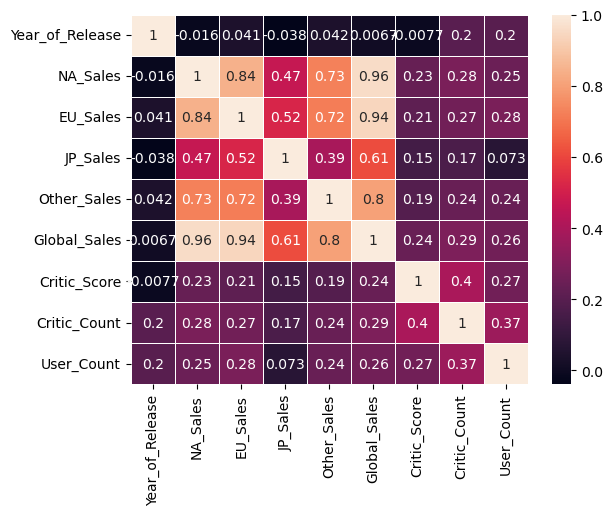

In [21]:
corr = dataBase.corr()
plt.figure()
hm = sns.heatmap(corr, annot=True, linewidths=.5)

La pregunta ara és: Per què atributs com Name o User_Score no surten? Perquè com podem veure més adalt, **no són de tipus object**, per tal de convertir-los farem lo següent:

In [22]:


nameCopy = dataBase.copy()
transform = list()

for column in nameCopy.columns:
    if column != "Name":
        transform.append(column)

nameCopy.drop(transform, axis="columns", inplace=True)

platformCopy = dataBase.copy()
transform = list()

for column in platformCopy.columns:
    if column != "Platform":
        transform.append(column)

platformCopy.drop(transform, axis="columns", inplace=True)

genreCopy = dataBase.copy()
transform = list()

for column in genreCopy.columns:
    if column != "Genre":
        transform.append(column)

genreCopy.drop(transform, axis="columns", inplace=True)

publishCopy = dataBase.copy()
transform = list()

for column in publishCopy.columns:
    if column != "Publisher":
        transform.append(column)

publishCopy.drop(transform, axis="columns", inplace=True)

userScoreCopy = dataBase.copy()
transform = list()

for column in userScoreCopy.columns:
    if column != "User_Score":
        transform.append(column)

userScoreCopy.drop(transform, axis="columns", inplace=True)

developerCopy = dataBase.copy()
transform = list()

for column in developerCopy.columns:
    if column != "User_Score":
        transform.append(column)

developerCopy.drop(transform, axis="columns", inplace=True)

ratingCopy = dataBase.copy()
transform = list()

for column in ratingCopy.columns:
    if column != "User_Score":
        transform.append(column)

ratingCopy.drop(transform, axis="columns", inplace=True)

encoder = OrdinalEncoder()
encoder.fit(nameCopy)
encoder.categories_
Name = encoder.transform(nameCopy)

encoder = OrdinalEncoder()
encoder.fit(platformCopy)
encoder.categories_
Platform = encoder.transform(platformCopy)

encoder = OrdinalEncoder()
encoder.fit(genreCopy)
encoder.categories_
Genre = encoder.transform(genreCopy)

encoder = OrdinalEncoder()
encoder.fit(publishCopy)
encoder.categories_
Publisher = encoder.transform(publishCopy)

encoder = OrdinalEncoder()
encoder.fit(userScoreCopy)
encoder.categories_
User_Score = encoder.transform(userScoreCopy)

encoder = OrdinalEncoder()
encoder.fit(developerCopy)
encoder.categories_
Developer = encoder.transform(developerCopy)


encoder = OrdinalEncoder()
encoder.fit(ratingCopy)
encoder.categories_
Rating = encoder.transform(ratingCopy)


dataBase["Name"] = Name
dataBase["Platform"] = Platform
dataBase["Genre"] = Genre
dataBase["Publisher"] = Publisher
dataBase["User_Score"] = User_Score
dataBase["Developer"] = Developer
dataBase["Rating"] = Rating

dataBase.info()

dataBase



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   float64
 1   Platform         6825 non-null   float64
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   float64
 4   Publisher        6825 non-null   float64
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   float64
 15  Rating           6825 non-null   float64
dtypes: float64(16)
memory usage: 906.4 KB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,4215.0,12.0,2006.0,10.0,160.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,72.0,322.0,72.0,72.0
2,2087.0,12.0,2008.0,6.0,160.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,75.0,709.0,75.0,75.0
3,4217.0,12.0,2009.0,10.0,160.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,72.0,192.0,72.0,72.0
6,2567.0,2.0,2006.0,4.0,160.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,77.0,431.0,77.0,77.0
7,4213.0,12.0,2006.0,3.0,160.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,58.0,129.0,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,1048.0,3.0,2001.0,0.0,158.0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,16.0,21.0,16.0,16.0
16677,2297.0,3.0,2002.0,2.0,146.0,0.01,0.00,0.00,0.00,0.01,81.0,12.0,80.0,9.0,80.0,80.0
16696,2194.0,5.0,2014.0,0.0,123.0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,68.0,412.0,68.0,68.0
16700,407.0,5.0,2011.0,8.0,53.0,0.01,0.00,0.00,0.00,0.01,61.0,12.0,50.0,43.0,50.0,50.0


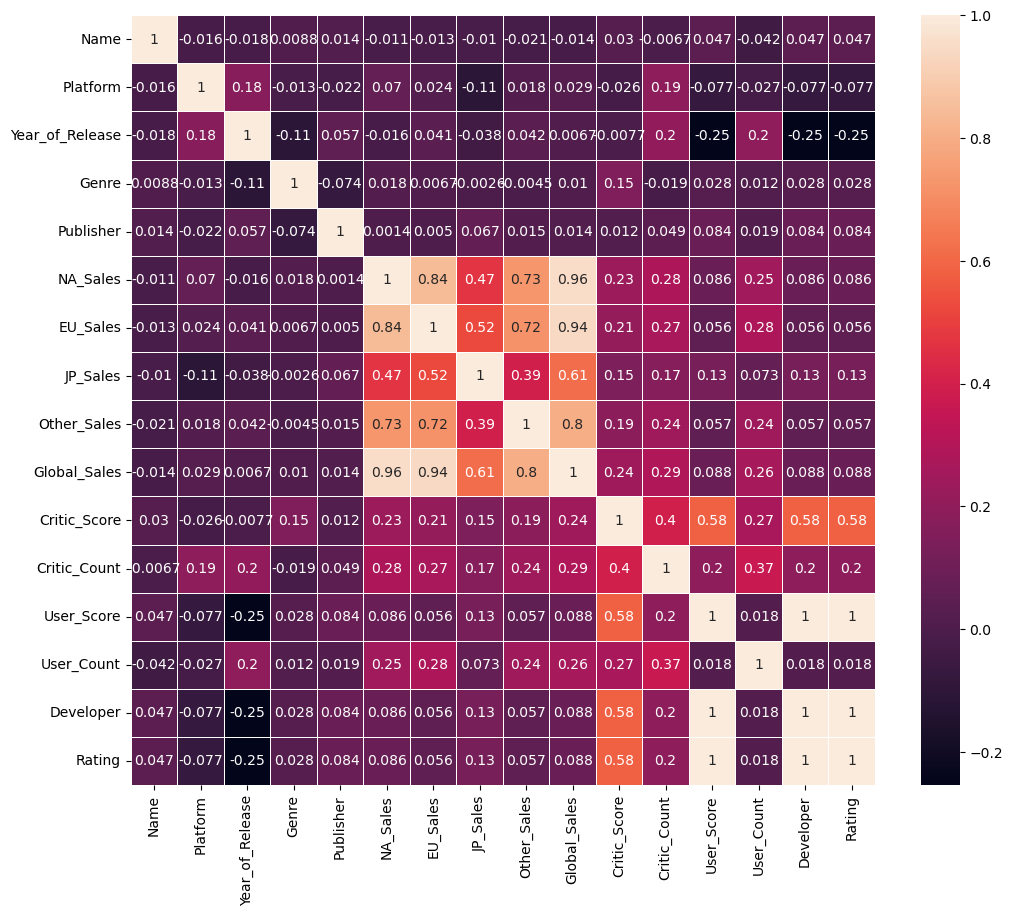

In [23]:
corr = dataBase.corr()
plt.figure(figsize=(12,10))
hm = sns.heatmap(corr, annot=True, linewidths=.5)

Jo, per aquesta pràctica he escollit predir el **Rating** tenint en compte les variables **NA_Sales**, **JP_Sales** i **Critic_Score** com veiem, la variable **Critic_Score** sí té correlació amb el **Rating** (0.58) però els atributs **NA_Sales** i **JP_Sales** no gaire (0,086 i 0.13), però penso que serà una variable interessant, perquè jo al menys penso que si un videojoc té més vendes, probablement tindrà més rating.
 Aquesta pràctica pot servir-me per entendre millor la relació entre aquestes variables.

Per fer més fàcil la predicció, dividiré l'atribut **Rating** en 4 quartils.

In [24]:
for column in dataBase.columns:
    if column == "Rating":
        dataBase[column] = pd.cut(dataBase[column].values, 4, labels = ["Bad", "Mid", "Nice", "Excelent"])

dataBase
dataBase["Rating"].value_counts()

Excelent    3569
Nice        2566
Mid          571
Bad          119
Name: Rating, dtype: int64

Aqui veiem com el rang 0, implicaria els jocs que tenen molt mal ràting.

El rang 1 implicaria que el seu ràting és normal.

El rang 2 implicaria que el seu ràting és bó.

El rang 3 implicaria que el seu ràting és molt bó o excelent.

També ens donem compte que l'atribut *Excelent* té moltes més mostres que *Bad* o *Mid*. (Haig de dir que d'això m'he donat compte després de fer tota la pràctica i donar-me compte que el SVM no pedia aquests atributs) Per tant aplicarem un tipus de oversampling per tal de predir millor els resultats.


In [31]:
db_excelent = dataBase[dataBase.Rating=="Excelent"]
db_nice = dataBase[dataBase.Rating=="Nice"]
db_mid = dataBase[dataBase.Rating=="Mid"]
db_bad = dataBase[dataBase.Rating=="Bad"]

samples = db_excelent.shape[0]

db_mid_upsampled = resample(db_mid, replace=True, samples=samples, random_state=123)
db_bad_upsampled = resample(db_bad, replace=True, samples=samples, random_state=123)

dataBase = pd.concat([db_excelent, db_nice, db_mid_upsampled, db_bad_upsampled])
dataBase.loc[~dataBase.index.duplicated(keep='first')]

print(dataBase.Rating.value_counts())

Bad         3569
Mid         3569
Excelent    3569
Nice        2566
Name: Rating, dtype: int64


In [32]:
dataBaseCopy = dataBase.copy()

trans = list()

for column in dataBaseCopy.columns:
    if column != "NA_Sales" and column != "JP_Sales" and column != "Critic_Score" and column != "Rating":
        trans.append(column)

dataBaseCopy.drop(trans, axis="columns",inplace=True)

data = dataBaseCopy.values

X = data[:, :-1]
y = data[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print(X_train)
print(y_train)

[[0.73 0.0 89.0]
 [0.34 0.0 65.0]
 [0.23 0.0 82.0]
 ...
 [0.07 0.0 62.0]
 [0.5 0.17 76.0]
 [0.18 0.0 65.0]]
['Excelent' 'Excelent' 'Excelent' ... 'Nice' 'Excelent' 'Mid']


In [34]:
standarizer = StandardScaler().fit(X_train)

X_train = standarizer.transform(X_train)
X_test = standarizer.transform(X_test)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

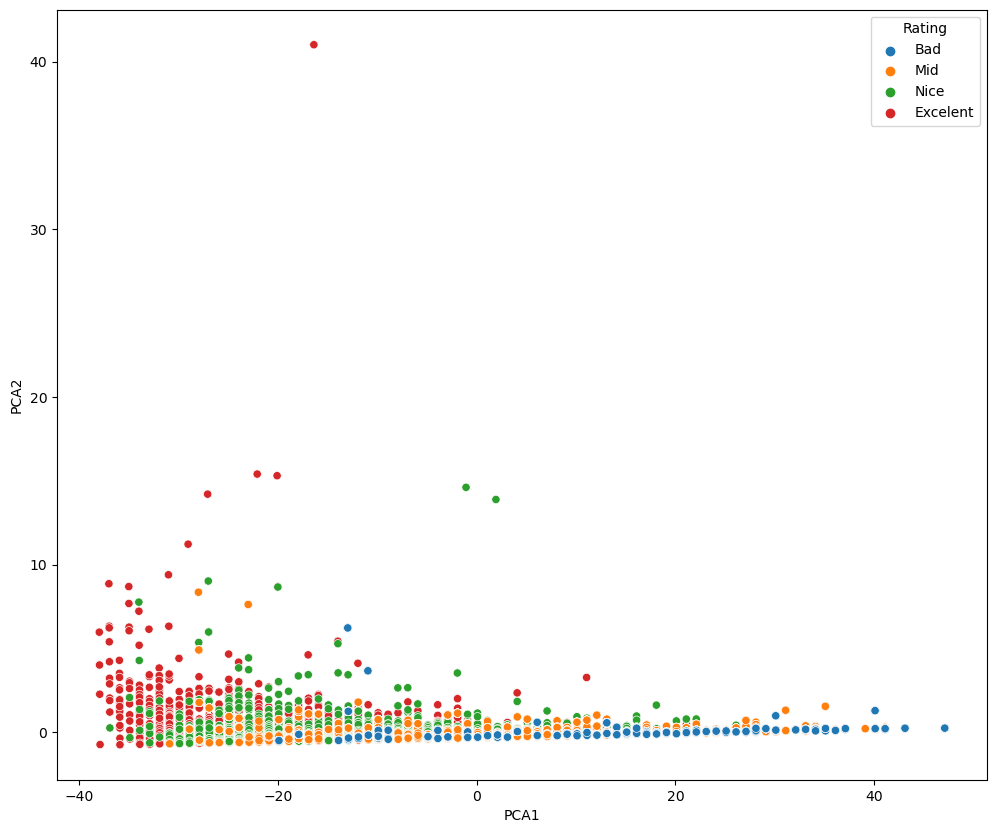

In [36]:
dataBaseCopy2 = dataBaseCopy.copy()
trans = list()

for column in dataBaseCopy2.columns:
    if column == "Rating":
        trans.append(column)

dataBaseCopy2.drop(trans, axis="columns",inplace=True)

pca21 = PCA(n_components=2, random_state=42)
pca22 = pca21.fit_transform(dataBaseCopy2[dataBaseCopy2.columns])

dataFrame2 = pd.DataFrame({"PCA1" : pca22[:,0],
                           "PCA2" : pca22[:,1], 
                           "Rating" : dataBaseCopy["Rating"]})

pca21.explained_variance_ratio_
pca21.explained_variance_ratio_.sum()

plt.figure(figsize=(12,10))

sns.scatterplot(x="PCA1", y="PCA2", hue="Rating", data=dataFrame2)

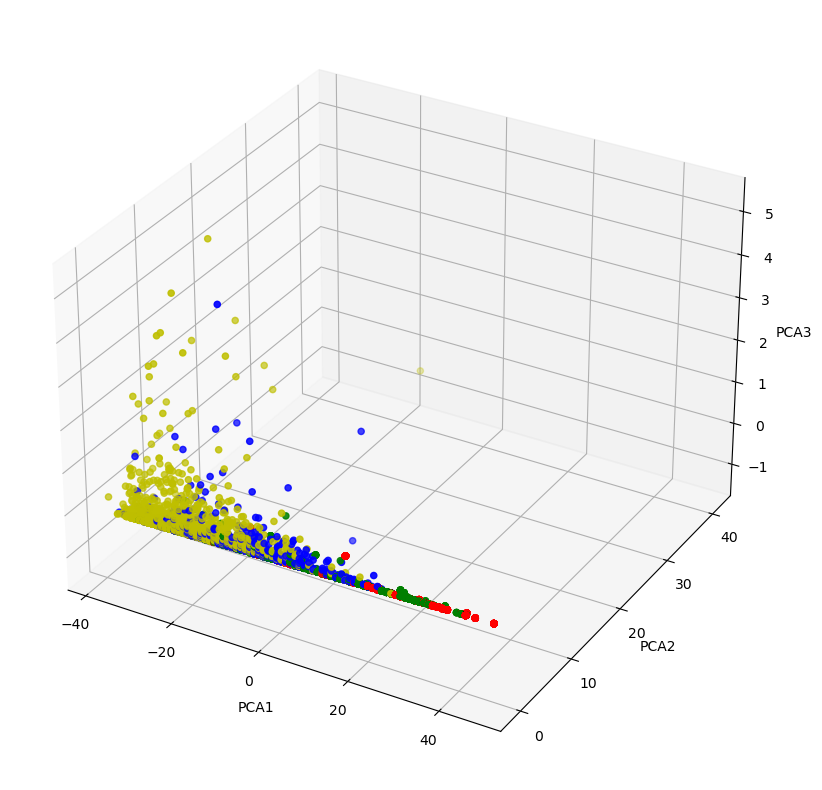

[[-1.15755031e-02 -1.77938762e-03 -9.99931418e-01]
 [ 9.94728811e-01  1.01871408e-01 -1.16965573e-02]
 [-1.01885234e-01  9.94795984e-01 -5.90795342e-04]]


In [37]:
dataBaseCopy3 = dataBaseCopy.copy()
trans = list()
for f in dataBaseCopy3.columns:
    if f == 'Rating':
        trans.append(f)
        
dataBaseCopy3.drop(trans, axis='columns', inplace=True)

pca31 = PCA(n_components=3, random_state=42)
pca32 = pca31.fit_transform(dataBaseCopy3[dataBaseCopy3.columns])

#pca32[:]

dataFrame3 = pd.DataFrame({'PCA1' : pca32[:,0], 'PCA2' : pca32[:,1], 
                     'PCA3' : pca32[:,2], 'Rating': dataBaseCopy['Rating']})

pca31.explained_variance_ratio_

pca31.explained_variance_ratio_.sum()

fig = plt.figure(figsize=(12,10))

plot = fig.add_subplot(111, projection='3d')

x = dataFrame3['PCA1']
y = dataFrame3['PCA2']
z = dataFrame3['PCA3']

col = dataFrame3['Rating'].map(
    {'Bad':'r', 'Mid':'g', 'Nice':'b', 'Excelent':'y'})

plot.scatter(x,y,z, c=col, marker='o')

plot.set_xlabel('PCA1')
plot.set_ylabel('PCA2')
plot.set_zlabel('PCA3')

plt.show()

print(pca31.components_)

Com veiem al gràfic (encara que ja ho vèiem a la matriu de correlació) està molt clar que quan PCA1 puja, el **Rating** també, i com veiem a la matriu d'adalt, PCA1 està quasi totalment representada per **Critic_Score**, de tal forma veiem que PCA2 varia bastant encara que el Rating no tant donat a que està quasi totalment representada per **JP_Sales** i pasa igual amb PCA3 que està quasi totalement representada per **NA_Sales**.

Una vegada vist que les classes no són linealment separables, utilitzarem algoritmes no lineals per tal de predir el **Rating**. Per aquesta pràctica utilitzaré els algoritmes: KNN, SVM i Decision Tree.

## Entrenament i Testing

## KNN

([<matplotlib.axis.XTick at 0x159d1eae3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

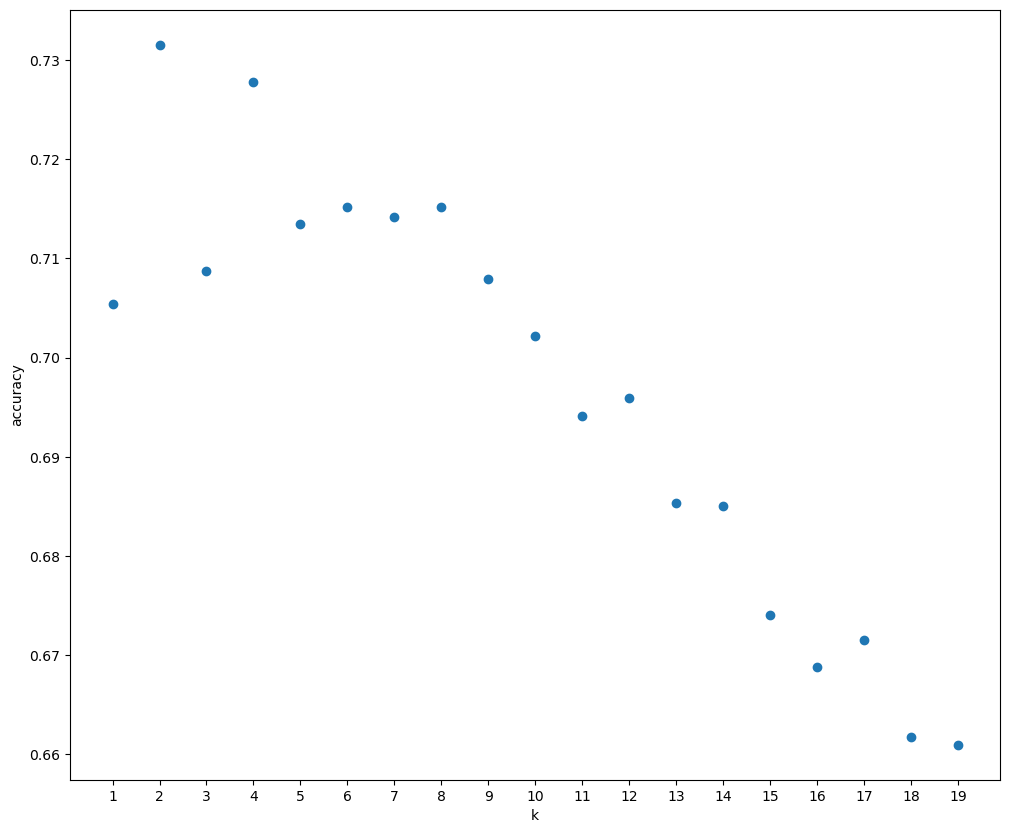

In [38]:
k_range = range(1,20)
score = list()

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

Veiem que la *K* amb més accuracy és la 2, per tant escollirem aquesta per ajustar el model. Després farem la k-fold cross validation per cercar la millor *K*

k = 2, 0.7110 accuracy, deviation 0.0014
k = 3, 0.7190 accuracy, deviation 0.0021
k = 4, 0.7264 accuracy, deviation 0.0057
k = 5, 0.7247 accuracy, deviation 0.0040
k = 6, 0.7296 accuracy, deviation 0.0066
k = 7, 0.7318 accuracy, deviation 0.0050
k = 8, 0.7337 accuracy, deviation 0.0067
k = 9, 0.7294 accuracy, deviation 0.0073
k = 10, 0.7286 accuracy, deviation 0.0082
k = 11, 0.7308 accuracy, deviation 0.0102
k = 12, 0.7307 accuracy, deviation 0.0080
k = 13, 0.7336 accuracy, deviation 0.0078
k = 14, 0.7332 accuracy, deviation 0.0091
k = 15, 0.7292 accuracy, deviation 0.0081
k = 16, 0.7322 accuracy, deviation 0.0129
k = 17, 0.7330 accuracy, deviation 0.0154
k = 18, 0.7336 accuracy, deviation 0.0159
k = 19, 0.7343 accuracy, deviation 0.0128


([<matplotlib.axis.XTick at 0x159ce131f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

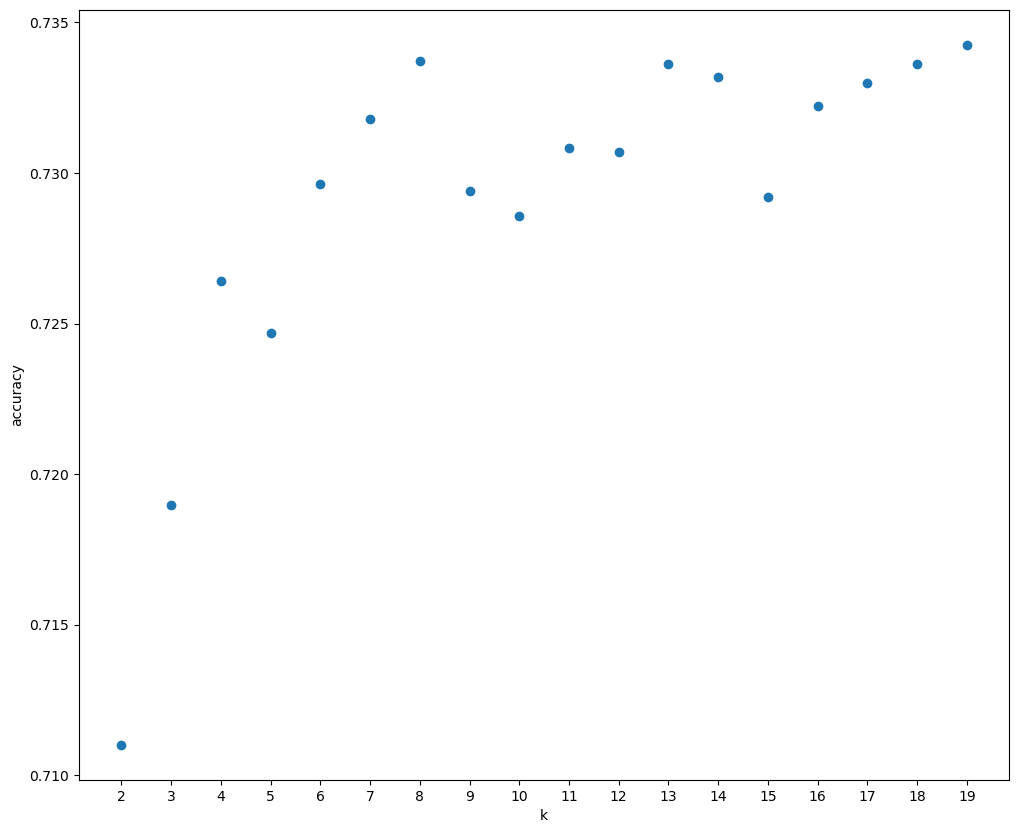

In [47]:
knn = KNeighborsClassifier(n_neighbors=2)
score = list()
k_range = range(2,20)

for k in k_range:
    s = cross_val_score(knn, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

Veiem que la millor *K* és la 19:

Metrics: 
               precision    recall  f1-score   support

         Bad       0.90      0.97      0.93      1032
    Excelent       0.61      0.80      0.69      1099
         Mid       0.78      0.83      0.81      1081
        Nice       0.48      0.18      0.26       770

    accuracy                           0.73      3982
   macro avg       0.69      0.69      0.67      3982
weighted avg       0.71      0.73      0.70      3982



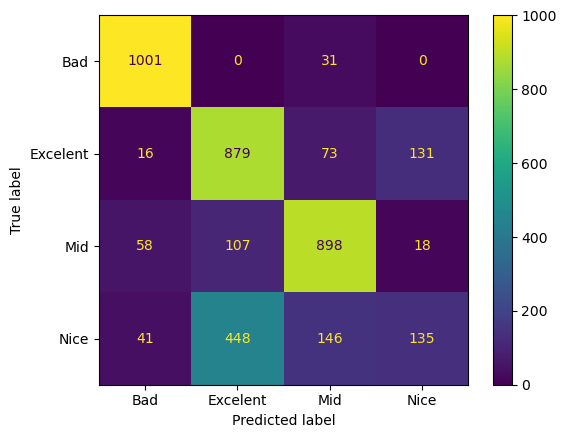

In [48]:
cross_val_score(knn, X_train,  y_train, cv=19, scoring="accuracy")

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(knn, X_test, y_test)

Podem veure que la precisió de *Bad* és molt bona, un 0.9, la de *Mid* és bastant bona també amb un 0.78, i les de *Excelent* i *Nice* una mica pitjors amb un 0.66 i un 0.48 respectivament.

Mostraré apart les corves ROC a continuació:

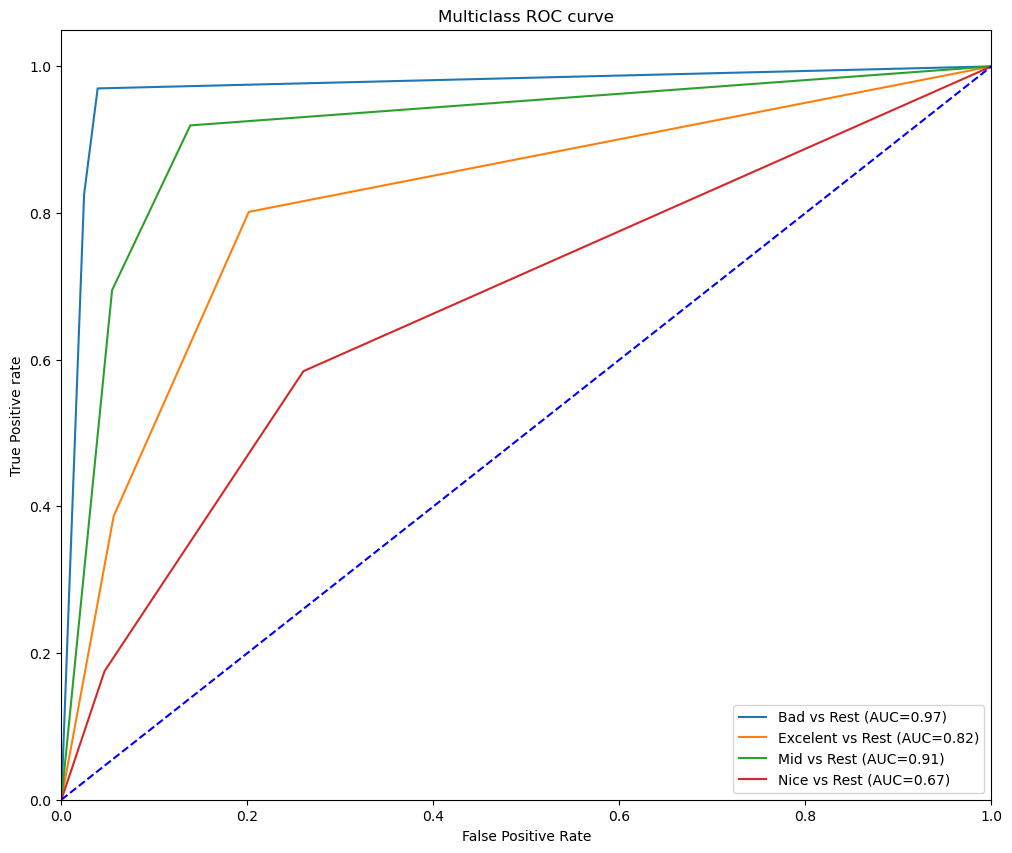

In [49]:
pred = knn.predict_proba(X_test)

plt.figure(figsize=(12,10))

y_testBin = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {} 
thresh = {}

roc_auc = dict()

classes = np.unique(y_test)
nClass = classes.shape[0]

for i in range(nClass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testBin[:,i], pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='-', label="%s vs Rest (AUC=%0.2f)"%(classes[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

En la gràfica veiem que el model està ben entrenat sobretot per a les categories *Mid*, *Excelent* i *Bad*. El rendiment és prou bo, per tant ho deixarem així.

## Decision Tree

k = 2, 0.7283 accuracy, deviation 0.0022
k = 3, 0.7401 accuracy, deviation 0.0025
k = 4, 0.7399 accuracy, deviation 0.0027
k = 5, 0.7460 accuracy, deviation 0.0061
k = 6, 0.7432 accuracy, deviation 0.0056
k = 7, 0.7441 accuracy, deviation 0.0101
k = 8, 0.7451 accuracy, deviation 0.0064
k = 9, 0.7424 accuracy, deviation 0.0066
k = 10, 0.7479 accuracy, deviation 0.0068
k = 11, 0.7449 accuracy, deviation 0.0093
k = 12, 0.7475 accuracy, deviation 0.0053
k = 13, 0.7486 accuracy, deviation 0.0087
k = 14, 0.7462 accuracy, deviation 0.0079
k = 15, 0.7506 accuracy, deviation 0.0104
k = 16, 0.7481 accuracy, deviation 0.0091
k = 17, 0.7481 accuracy, deviation 0.0124
k = 18, 0.7462 accuracy, deviation 0.0101
k = 19, 0.7512 accuracy, deviation 0.0152


([<matplotlib.axis.XTick at 0x159d30c04f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

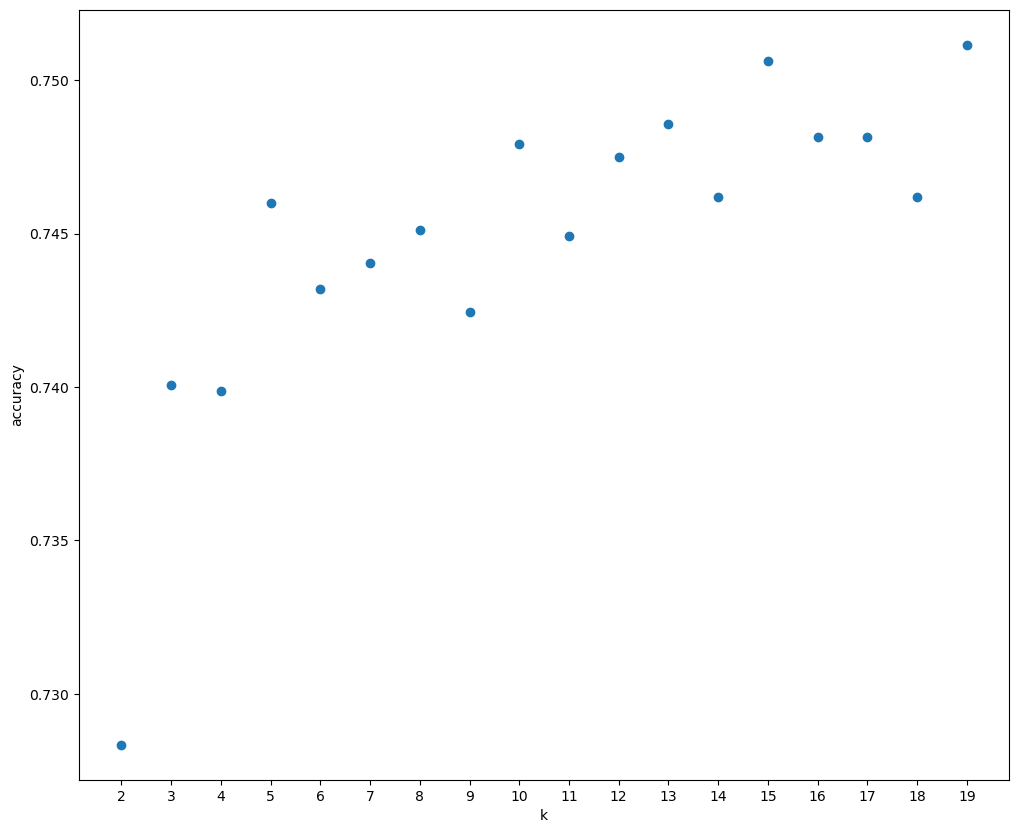

In [42]:
DecisionTree = DecisionTreeClassifier(random_state=42)

score = list()
k_range = range(2,20)

for k in k_range:
    s = cross_val_score(DecisionTree, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

Com veiem, la millor *K* és la 19:

Metrics: 
               precision    recall  f1-score   support

         Bad       0.91      0.99      0.95      1032
    Excelent       0.66      0.67      0.66      1099
         Mid       0.81      0.88      0.84      1081
        Nice       0.47      0.35      0.40       770

    accuracy                           0.75      3982
   macro avg       0.71      0.72      0.71      3982
weighted avg       0.73      0.75      0.74      3982



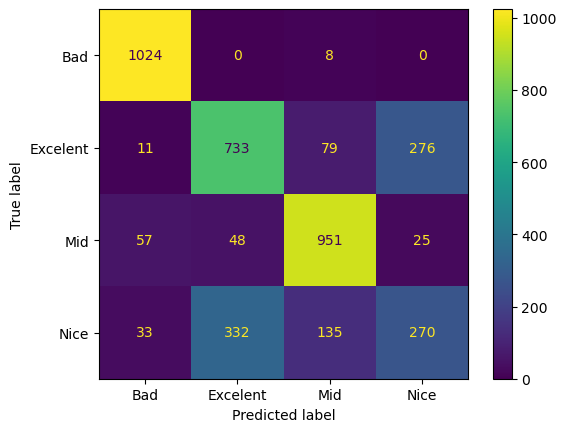

In [50]:
cross_val_score(DecisionTree, X_train, y_train, cv=19, scoring='accuracy')

DecisionTree = DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(DecisionTree, X_test, y_test)

Veiem que les prediccions sobretot de *Bad* i *Mid* són les millors, amb un 0.91 i un 0.81 de precisió. Seguit de *Excelent* amb un 0.66 i *Nice* amb un 0.47. Igualment mostraré les corves ROC:

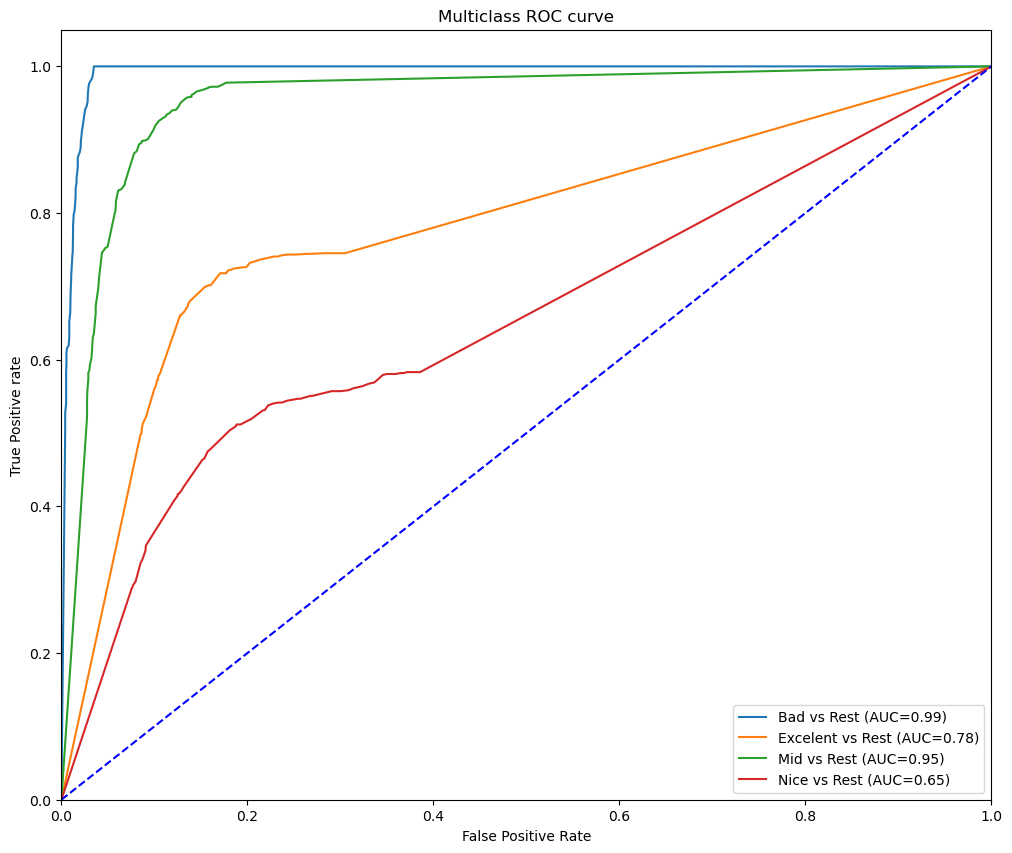

In [51]:
pred = DecisionTree.predict_proba(X_test)

plt.figure(figsize=(12,10))

y_testBin = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {} 
thresh = {}

roc_auc = dict()

classes = np.unique(y_test)
nClass = classes.shape[0]

for i in range(nClass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testBin[:,i], pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='-', label="%s vs Rest (AUC=%0.2f)"%(classes[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

A la gràfica veiem que millora l'anterior, així que no modificarem res.

## SVM

In [52]:
grid_hp = {"C" : [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]}

grid_search = GridSearchCV(estimator= svm.SVC(kernel="linear", random_state=0),
                           param_grid=grid_hp,
                           cv=5,
                           scoring="accuracy",
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10]},
             scoring='accuracy')

k = 2, 0.5052 accuracy, deviation 0.0005
k = 3, 0.5054 accuracy, deviation 0.0063
k = 4, 0.5068 accuracy, deviation 0.0042
k = 5, 0.5101 accuracy, deviation 0.0091
k = 6, 0.5071 accuracy, deviation 0.0111
k = 7, 0.5077 accuracy, deviation 0.0047
k = 8, 0.5089 accuracy, deviation 0.0130
k = 9, 0.5074 accuracy, deviation 0.0141
k = 10, 0.5075 accuracy, deviation 0.0149
k = 11, 0.5086 accuracy, deviation 0.0124
k = 12, 0.5084 accuracy, deviation 0.0162
k = 13, 0.5069 accuracy, deviation 0.0202
k = 14, 0.5083 accuracy, deviation 0.0126
k = 15, 0.5075 accuracy, deviation 0.0174
k = 16, 0.5075 accuracy, deviation 0.0224
k = 17, 0.5080 accuracy, deviation 0.0143
k = 18, 0.5081 accuracy, deviation 0.0162
k = 19, 0.5084 accuracy, deviation 0.0222


([<matplotlib.axis.XTick at 0x159d1699670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

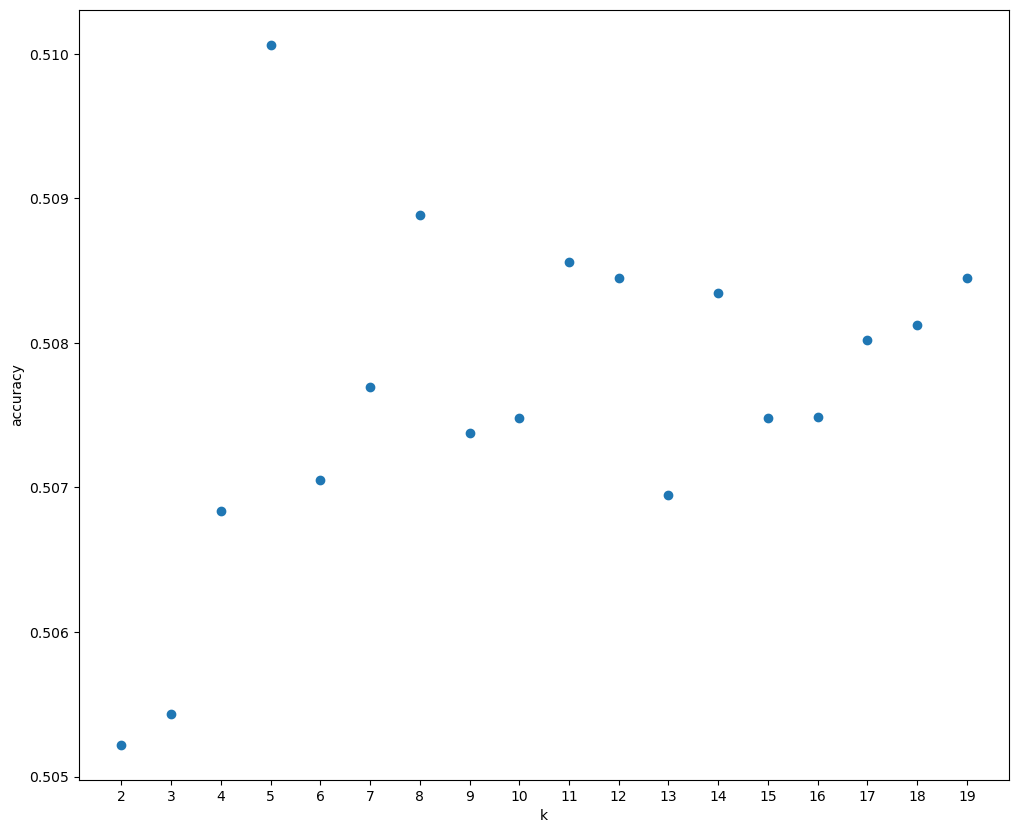

In [53]:
svmLineal = svm.SVC(kernel="linear",
                    C=grid_search.best_params_.get("C"),
                    random_state=0,
                    probability=True)

score = list()
k_range = range(2,20)

for k in k_range:
    s = cross_val_score(svmLineal, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

La millor *K* és 5 per la desviació, així que anem a entrenar-ho.

Metrics: 
               precision    recall  f1-score   support

         Bad       0.58      0.70      0.63      1032
    Excelent       0.54      0.83      0.65      1099
         Mid       0.40      0.30      0.34      1081
        Nice       0.33      0.09      0.14       770

    accuracy                           0.51      3982
   macro avg       0.46      0.48      0.44      3982
weighted avg       0.47      0.51      0.47      3982



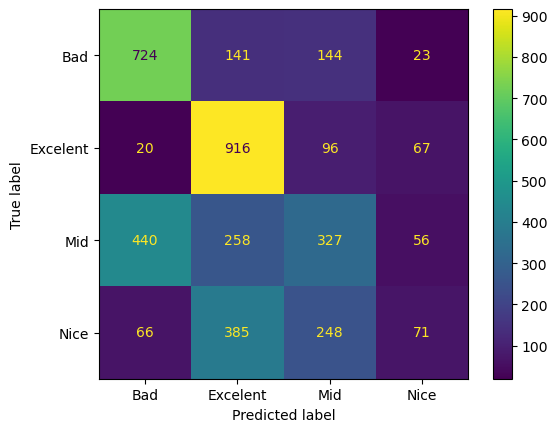

In [55]:
cross_val_score(svmLineal, X_train, y_train, cv=5, scoring='accuracy')

svmLineal.fit(X_train, y_train)

y_pred = svmLineal.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(svmLineal, X_test, y_test)

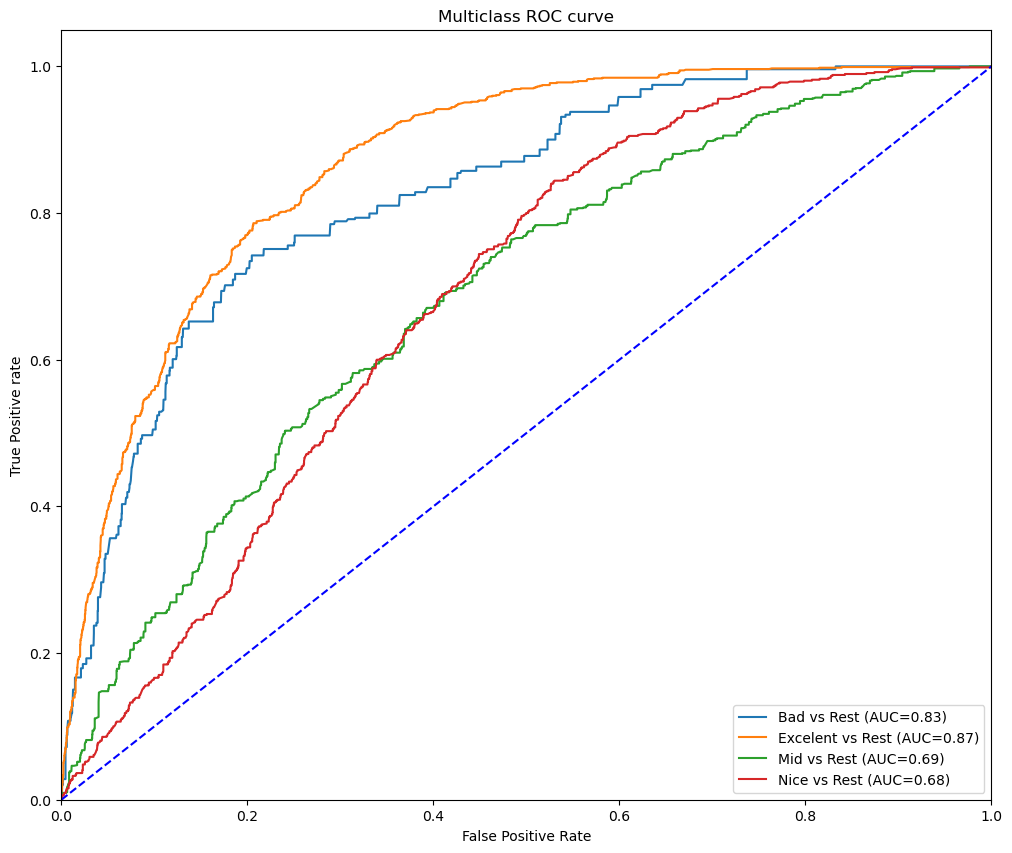

In [56]:
pred = svmLineal.predict_proba(X_test)

plt.figure(figsize=(12,10))

y_testBin = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {} 
thresh = {}

roc_auc = dict()

classes = np.unique(y_test)
nClass = classes.shape[0]

for i in range(nClass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testBin[:,i], pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='-', label="%s vs Rest (AUC=%0.2f)"%(classes[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

M'agradaria comentar, abans de passar a les conclusions, que al fer les prediccions, és cert que en comptes d'agafar els 3000 elements sencers agafan aproximadament 1/3, no sé perquè sincerament, però penso que és una part prou significativa com per dir que representa la realitat.

## Conclusions

Podem veure que el que millor accurracy té és el KNN amb un 54%, tot i que fent les millores que he comentat, el SVM tant Lineal com Polinomial podrien superar-lo.